In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
ds = pd.read_parquet("../datasets/CICIDS-2017.parquet")

In [4]:
scaler = StandardScaler()
scaled_ds = scaler.fit_transform(ds.select_dtypes(include=np.number))

In [5]:
pca = PCA(n_components=2)
pca.fit(scaled_ds)

PCA(n_components=2)

In [6]:
pd.unique(ds['Label'])

array(['BENIGN', 'PortScan', 'Infiltration', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [7]:
brute_force_index =  (ds['Label'] == 'FTP-Patator') | (ds['Label'] == 'SSH-Patator')
brute_force = scaled_ds[brute_force_index]

['FTP-Patator' 'SSH-Patator']


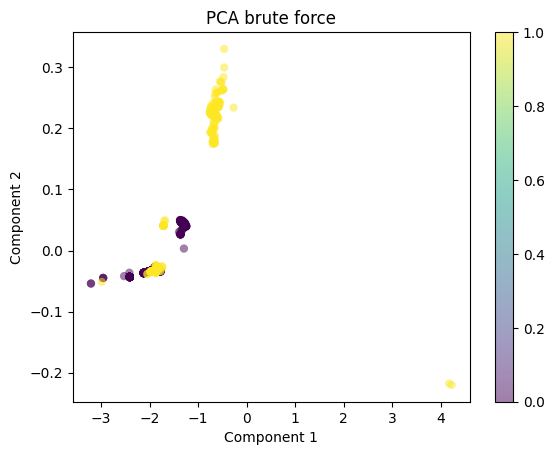

In [57]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[brute_force_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(brute_force)

print(label_encoder.inverse_transform([0,1]))

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA brute force")
plt.colorbar();

In [9]:
web_attack_index = (ds['Label'] == 'Web Attack  Brute Force') | (ds['Label'] == 'Web Attack  XSS') | (ds['Label'] == 'Web Attack  Sql Injection')
web_attack = scaled_ds[web_attack_index]

['Web Attack  Brute Force' 'Web Attack  Sql Injection' 'Web Attack  XSS']


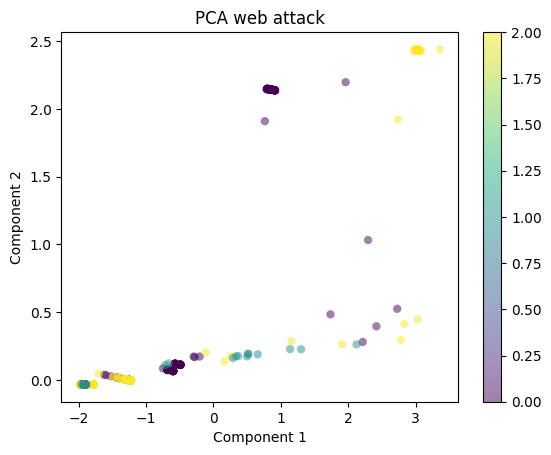

In [58]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[web_attack_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(web_attack)

print(label_encoder.inverse_transform([0,1,2]))


# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA web attack")
plt.colorbar();

In [11]:
pd.unique(ds['Label'])

array(['BENIGN', 'PortScan', 'Infiltration', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [12]:
dos_attack_index = (ds['Label'] == 'DDoS') | (ds['Label'] == 'DoS slowloris') | (ds['Label'] == 'DoS Slowhttptest') | (ds['Label'] == 'DoS Hulk') | (ds['Label'] == 'DoS GoldenEye') | (ds['Label'] == 'Heartbleed')
dos_attack = scaled_ds[dos_attack_index]

['DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris'
 'Heartbleed']


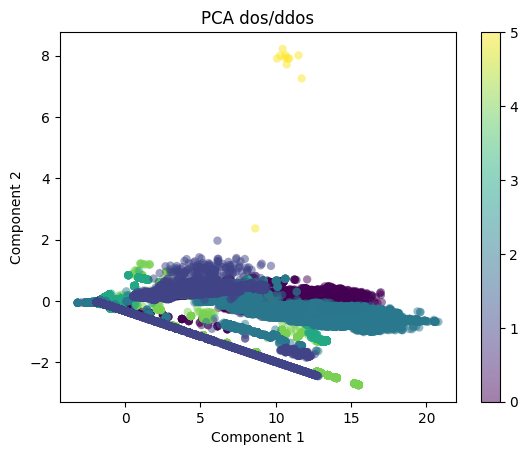

In [53]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[dos_attack_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(dos_attack)

print(label_encoder.inverse_transform([0,1,2,3,4,5]))

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA dos/ddos")
plt.colorbar();

In [17]:
#tsne = TSNE(n_components=2, perplexity=50, verbose=1)
#tsne.fit(scaled_ds)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2827677 samples in 1.361s...


In [37]:
attacks = pd.unique(ds['Label']).tolist()
distances = []
attack_names = []

for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            distances.append(distance.euclidean(scaled_ds[ds['Label'] == attack1].mean(0), scaled_ds[ds['Label'] == attack2].mean(0)))
            attack_names.append(attack1 + " - " + attack2)
    attacks.pop(0)

attacks_distances = pd.DataFrame({'attack': attack_names, 'distance': distances})

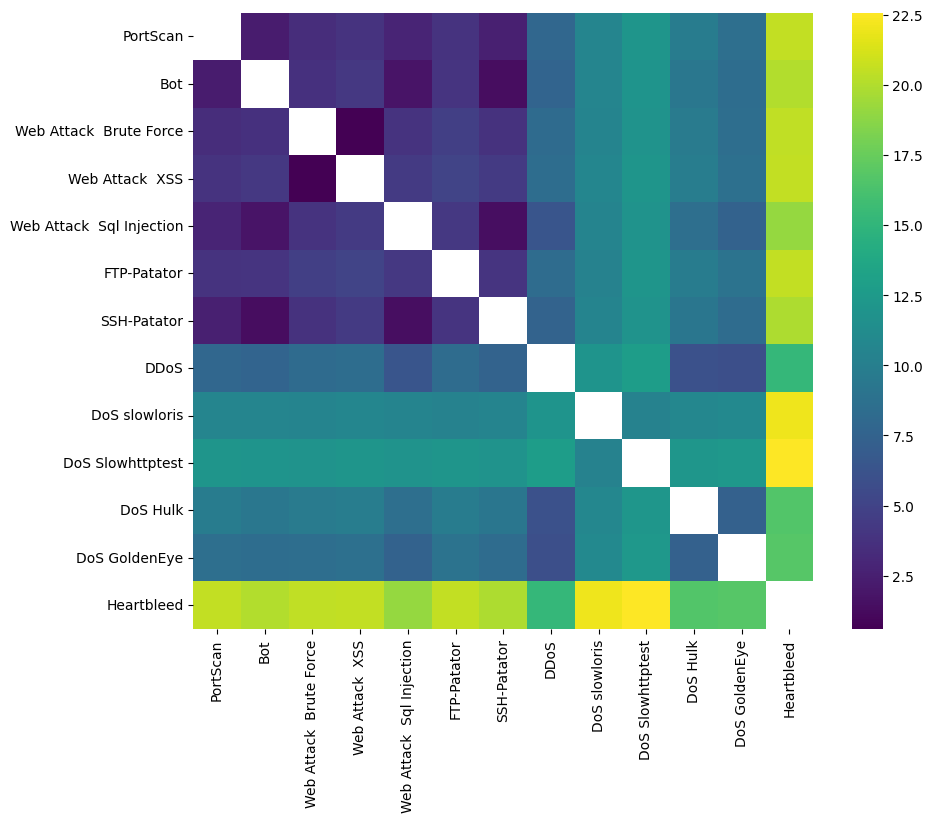

In [49]:
attacks = ['PortScan', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

# Creare un DataFrame vuoto con gli attacchi come indici e colonne
heatmap_data = pd.DataFrame(np.nan, index=attacks, columns=attacks)

# Riempire il DataFrame con le distanze euclidee
for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            mean1 = scaled_ds[ds['Label'] == attack1].mean(0)
            mean2 = scaled_ds[ds['Label'] == attack2].mean(0)
            heatmap_data.loc[attack1, attack2] = distance.euclidean(mean1, mean2)

# Creare la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), cmap='viridis')
plt.show()

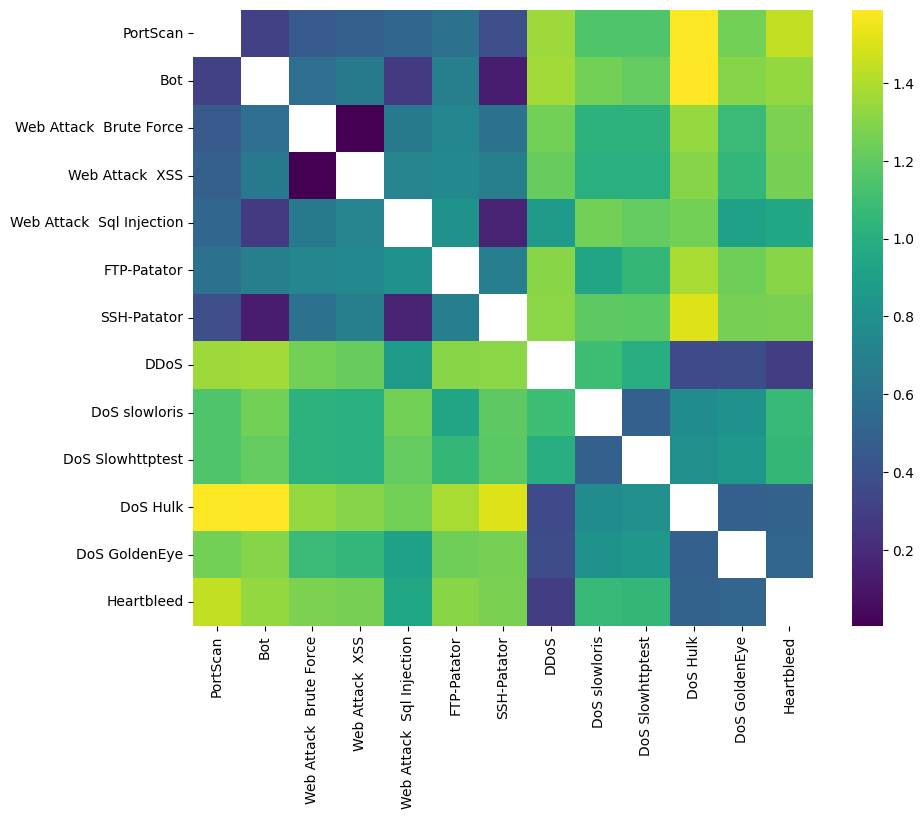

In [50]:
attacks = ['PortScan', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

# Creare un DataFrame vuoto con gli attacchi come indici e colonne
heatmap_data = pd.DataFrame(np.nan, index=attacks, columns=attacks)

# Riempire il DataFrame con le distanze euclidee
for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            mean1 = scaled_ds[ds['Label'] == attack1].mean(0)
            mean2 = scaled_ds[ds['Label'] == attack2].mean(0)
            heatmap_data.loc[attack1, attack2] = distance.cosine(mean1, mean2)

# Creare la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), cmap='viridis')
plt.show()

In [39]:
attacks_distances.sort_values(by=['distance'], ascending=False)

,attack,distance
26,Infiltration - Heartbleed,55.949285
25,Infiltration - DoS GoldenEye,55.149287
21,Infiltration - DDoS,55.135594
14,Infiltration - PortScan,55.025056
24,Infiltration - DoS Hulk,55.005330
...,...,...
2,BENIGN - Bot,2.245191
39,Web Attack Sql Injection - Bot,1.798014
52,SSH-Patator - Web Attack Sql Injection,1.403928
43,Web Attack Sql Injection - SSH-Patator,1.403928


In [41]:
attacks_distances.sort_values(by=['distance'], ascending=False).to_csv('attacks_distances.csv', index=False)